# Project2 Part1 - Text Analysis through TFIDF computation


In [1]:
from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim, similarity_matrix

import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
# run text_analyzer.py with default arguments
!python text_analyzer.py


Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 5), ('to', 4), ('and', 3), ('that', 2), ('might', 2), ('but', 2), ('by', 2), ('his', 2), ('tender', 2), ('thou', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('from', 1), ('fairest', 1), ('creatures', 1), ('we', 1), ('desire', 1)]
Corpus TF (Top 20):
[('and', 491), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 343), ('in', 322), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('is', 168), ('a', 166), ('not', 166), ('me', 164), ('but', 163), ('love', 162), ('thee', 161), ('so', 144)]
Corpus IDF (Top 20):
[('beweep', 5.0369526024136295), ('desiring', 5.0369526024136295), ('enjoy', 5.0369526024136295), ('trouble', 5.0369526024136295), ('fate', 5.0369526024136295), ('bootless', 5.0369526024136295), ('outcast', 5.0369526024136295), ('gate', 5.0369526024136295), ('wishing', 5.0369526024136295), ('deaf', 5.0369526024136295), ('lark', 5.0369526024136295), ('mans', 5.0369526024136295), ('despising', 5

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

Argparse allows us pass arguments to our program when we run it on the command line, and retrieve the parameters passed in. It also lets us define the flags used, default values, and document how each is used so that useful help and error messages can be provided to the user if required

## b. Read and Clean the data

In [3]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [4]:
corpus['1']

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

## c. TF

In [5]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']

# determine tf of sonnet
sonnet1_tf = tf(sonnet1)

# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,5
2,to,4
3,and,3
4,that,2
5,might,2
6,but,2
7,by,2
8,his,2
9,tender,2


In [6]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,and,491
1,the,430
2,to,408
3,my,397
4,of,372
5,i,343
6,in,322
7,that,320
8,thy,287
9,thou,235


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

No, because all the documents have similar words that are the most frequent, such as "the" and "and". We could improve this representation by weighting uncommon words more than the most frequent words. I would consider transition words to be "noise" in our data because those words don't contribute any extra meaning to the documents yet they still appear very often. 

## d. IDF

In [7]:
# IDF of corpus
corpus_idf = idf(corpus)
corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,enjoy,5.036953
1,outcast,5.036953
2,mans,5.036953
3,deaf,5.036953
4,wishing,5.036953
5,despising,5.036953
6,beweep,5.036953
7,fate,5.036953
8,featured,5.036953
9,arising,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

The IDF scores are much smaller for each word, resulting in values being a lot denser than TF scores. Due to the log scale, it also reduces the effect of outliers by constraining scores to a much smaller range

## e. TF-IDF

In [8]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)
sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,worlds,7.301316
1,tender,6.490386
2,feedst,5.036953
3,lights,5.036953
4,selfsubstantial,5.036953
5,fuel,5.036953
6,famine,5.036953
7,foe,5.036953
8,herald,5.036953
9,gaudy,5.036953


### Q. What is different with this list than just using TF?

Using TF gives a much larger scale. Using IDF gives a tighter range, so outliers don't skew data as much.

## f. Compare all documents

In [9]:
# Compute the similarity matrix for the corpus
import numpy as np

matrix = similarity_matrix(cosine_sim, corpus, corpus_idf)

In [10]:
SIMILARITY_THRESHOLD = 0.5

docs = list(corpus.keys())

for i in range(len(docs)):
    for j in range(i):
        if matrix[i][j] > SIMILARITY_THRESHOLD:
            print(f"(!) Documents {docs[i]} and {docs[j]} are similar.")

(!) Documents 153 and 154 are similar.


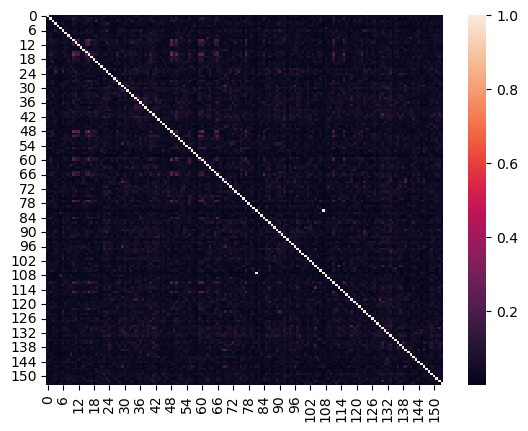

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix)
plt.show()

### Q. Observe the heatmap. What insight do you get from it?

The heatmap visualizes similarity between the documents in our corpus. It gives insight into how similar all the documents are to one another. Specifically, it shows